In [1]:
import pandas as pd
from pandasql import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

Importing CSV files into Pandas DataFrames

In [2]:
Airlines_PD = pd.read_csv('Airlines.csv')

In [3]:
Airlines_PD

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201659,2015-01-10 00:00:00,NK,188.0,OAK,LAS,-16.0,0.0,407.0,NaN,NaN,NaN,NaN,NaN,77.0
201660,2015-01-11 00:00:00,NK,188.0,OAK,LAS,-4.0,0.0,407.0,NaN,NaN,NaN,NaN,NaN,87.0
201661,2015-01-12 00:00:00,NK,188.0,OAK,LAS,-7.0,0.0,407.0,NaN,NaN,NaN,NaN,NaN,82.0
201662,2015-01-13 00:00:00,NK,188.0,OAK,LAS,23.0,0.0,407.0,3.0,0.0,0.0,20.0,0.0,103.0


The Pandas DataFrame will allow us to work with SQL and selecting the Data.

Below is a table of Airline codes that will help identify the Airline names in the Main files

In [4]:
Codes = pd.read_csv('Airline_codes.csv')

In [5]:
pysqldf = lambda q: sqldf(q, globals())

q = """
SELECT Codes.Airline AS AirlineName, 
       Trips.arr_delay as Delay
FROM   Airlines_PD as Trips
LEFT JOIN Codes
ON Trips.unique_carrier = Codes.Code
"""



In [6]:
Airline_By_delay = sqldf(q)

In [7]:
Airline_By_delay

,AirlineName,Delay
0,American Airlines Inc.,-19.0
1,American Airlines Inc.,-39.0
2,American Airlines Inc.,-12.0
3,American Airlines Inc.,-8.0
4,American Airlines Inc.,25.0
...,...,...
201659,Spirit Airlines,-16.0
201660,Spirit Airlines,-4.0
201661,Spirit Airlines,-7.0
201662,Spirit Airlines,23.0


In [8]:
Group_Airlines = Airline_By_delay.groupby(['AirlineName']).mean()

In [9]:
Group_Airlines

,Delay
AirlineName,
Alaska Airlines,1.731951
American Airlines Inc.,15.616299
Delta Airlines,4.118949
Envoy Air,35.627406
ExpressJet,18.358520
Frontier Airlines,28.836953
Hawaiian Airlines,6.458937
JetBlue Airways,13.576129
Skywest Airlines,19.031663


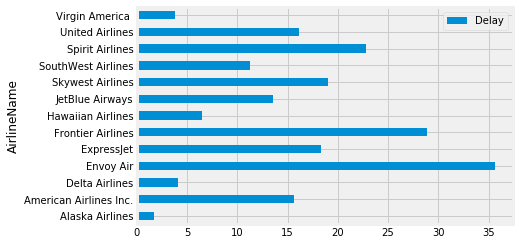

In [10]:
Group_Airlines.plot.barh()

From this bar graph, we can see average delay for all the Airlines. From what are able to see, there is a large difference between the airlines listed here. 
Some airlines have little to no delay or a large delay. 

But when we look at the data, we can see negative delays, which tells us about the flight leaving early, which does not help us identify the delays. 

What we will do next is to use SQL again to select the flights that are delayed. But rather grouping using Pandas, we can do it straight from SQL in this case.

In [11]:
q = """
SELECT Codes.Airline AS AirlineName, 
       Trips.arr_delay as Delay
FROM   Airlines_PD as Trips
LEFT JOIN Codes
ON Trips.unique_carrier = Codes.Code
WHERE Delay > 0 
GROUP BY AirlineName
ORDER BY Delay DESC
"""


In [12]:
Airline_By_delay = sqldf(q)

In [13]:
Airline_By_delay

,AirlineName,Delay
0,Envoy Air,160.0
1,Frontier Airlines,38.0
2,Spirit Airlines,31.0
3,ExpressJet,26.0
4,American Airlines Inc.,25.0
5,SouthWest Airlines,18.0
6,None,17.0
7,Alaska Airlines,16.0
8,United Airlines,11.0
9,JetBlue Airways,9.0


From what we can see in this dataFrame, there are less flights listed from removing the non-delays. This should help with getting better delay averages. 

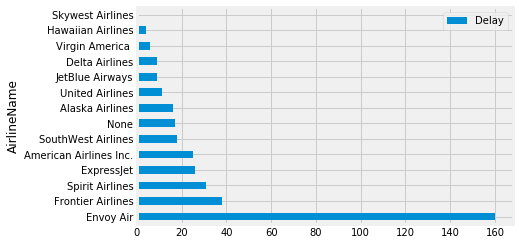

In [14]:
Airline_By_delay.plot.barh(x = 'AirlineName')

This plot is more representive of the delay data. Rather than including non-delays, we can now see that all airlines have a delay in their flights. Now we can see that some airline delays are greater than others.

We can do much more visualization with this from the main table including working with location of departure and arrivals or type of delay. We can do with by working with SQL where it will select and group our data.

This plot is more representive of the delay data. Rather than including non-delays, we can now see that all airlines have a delay in their flights.
Now we can see that some airline delays are greater than others. 

We can do much more visualization with this from the main table including working with location of departure and arrivals or type of delay. We can do with by working with SQL where it will select and group our data.